In [195]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import pandas as pd
from urllib.request import urlopen
from xmltodict import parse
import re

# Question 1

Write a python function that takes 4 arguments `a`, `b`, `N` and `fn` where 

* `a` and `b` determine an interval in $\mathbb{R}$ 
* `N` is a positive integer and 
* `fn` is a real valued function

The function you write should calculate the Riemann sum of the function `fn` over the interval [`a`,`b`] with `N` equal subintervals.

In [1]:
def RiemannSum(a,b,N,fn):
    deltax = (b-a)/N
    res = 0.0
    for i in range(N):
        res += fn(i*deltax)
    return res*deltax

In [3]:
RiemannSum(0,1,100,lambda x: x)

0.495

In [5]:
def RiemannSum(a,b,N,fn):
    xs = np.linspace(a,b,N)
    res = sum(np.vectorize(fn)(xs))
    return res*(b-a)/N

In [6]:
RiemannSum(0,1,100,lambda x: x)

0.5

# Question 2

We want to sample random points from the unit circle $x^2+y^2=1$. Write a python function which takes one parameter $N$ the number of sample points and returns a sample $N$ points on the unit circle as a $N\times 2$ numpy matrix. Calculate some examples, and visualize them.

In [15]:
def SampleS1(N):
    thetas = np.random.uniform(0,2*np.pi,N)
    return np.array([[np.sin(theta),np.cos(theta)] for theta in thetas])

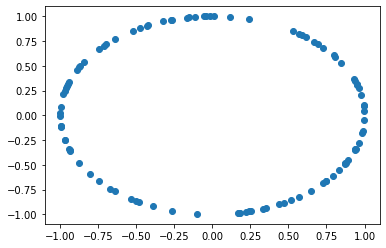

In [16]:
sample = SampleS1(100)

plt.scatter(sample[:,0],sample[:,1])

# Question 3

Generalize the function above to sampling over the unit sphere $x^2+y^2+z^2=1$. The function should return a $N\times 3$ numpy array.  Calculate some examples, and visualize them. [Hint: Use spherical coordinates.]

In [25]:
def SampleS2(N):
    phis = np.random.uniform(0,2*np.pi,N)
    S1 = SampleS1(N)
    return np.array([np.append(np.cos(phi)*p,np.sin(phi)) for p,phi in zip(S1,phis)])

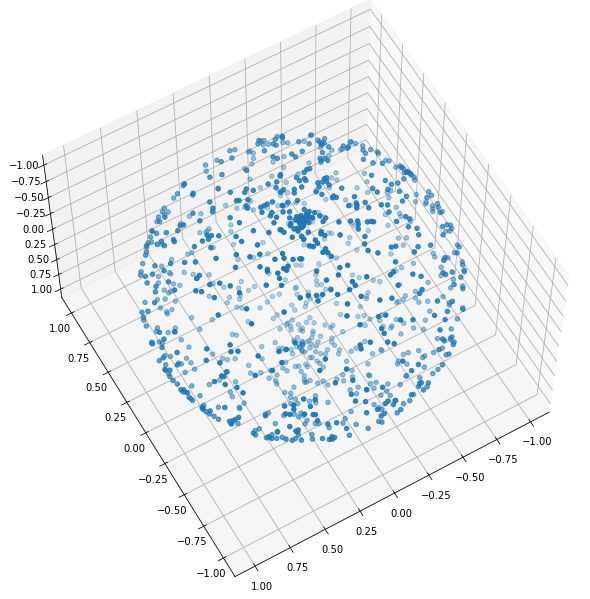

In [31]:
S2 = SampleS2(1000)

fig = plt.figure(figsize=(8,8))

ax = Axes3D(fig, elev=-120, azim=120, auto_add_to_figure=False)
ax.scatter(S2[:,0],S2[:,1],S2[:,2])
fig.add_axes(ax)

plt.show()

# Question 4

How can we generalize this to sampling over an $n$-dimensional sphere $x_1^2+\cdots+x_n^2=1$? Write a python function and explain your code.

In [36]:
def SampleSk(N,k):
    pts = np.random.uniform(-1,1,N*k).reshape((N,k))
    return(np.array([p/np.linalg.norm(p) for p in pts]))

In [38]:
SampleSk(10,4)

array([[ 0.22267941, -0.36314178,  0.47351678,  0.77092398],
       [ 0.04220632, -0.66051706, -0.68146347, -0.31231935],
       [ 0.62638265,  0.45550569,  0.62733709,  0.08128663],
       [-0.2873795 , -0.59784266, -0.07922164,  0.74412439],
       [-0.69241797,  0.34486344, -0.47321899,  0.42153332],
       [-0.62859024,  0.50770557, -0.58821873, -0.03328805],
       [-0.68684829, -0.2703922 , -0.14123029, -0.65968287],
       [ 0.06825666,  0.55914681,  0.52400899,  0.63883523],
       [-0.77342095,  0.02798539, -0.08993586,  0.62685596],
       [ 0.79644404,  0.42303602, -0.01850042,  0.43171189]])

# Question 5

Istanbul Municipality has a [data service](https://data.ibb.gov.tr/) that is accessible via an API. Your task is to visualize the stops. Use the [Basemap](https://matplotlib.org/basemap/) library to draw the map.  Their locations (longitudes and latitudes) are given at this [link](https://data.ibb.gov.tr/dataset/public-transport-gtfs-data/resource/d1f7c258-bbc1-406f-9ab2-7a7c1797c673). Here is a list of things I'd like:

1. You should pull the data via the API. I don't want to see the file locally.
2. In the visualization, the size of the dot representing each stop should depend on the number of people using it.

For the second part, browse through the data server and find the relevant data source.

In [175]:
rawRail = pd.read_csv('https://data.ibb.gov.tr/dataset/ae3b2e4b-073a-48d0-8ef3-f28f19bcb19c/resource/604776d6-e99f-469c-bf25-25ccadc5e89b/download/rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.csv')

tmp = rawRail[rawRail['transaction_Year']==2019].groupby('STATION_NAME')
sizes = tmp['PASSENGER_COUNT'].sum()/1e3
latitudes = tmp['LATITUDE'].max()
longitudes = tmp['LONGITUDE'].max()

rail = pd.DataFrame({'size': sizes, 'latitude': latitudes, 'longitude': longitudes})
rail

,size,latitude,longitude
STATION_NAME,,,
4 Levent 2 Güney,1680.192,41.085722,29.006861
4 Levent Kuzey,2117.743,41.085722,29.006861
AKSARAY,3439.550,41.011833,28.947889
AKSARAY 1,1199.576,41.011833,28.947889
ALTINŞEHİR,561.571,41.016694,29.140111
...,...,...,...
Şehitlik,2005.073,41.034278,28.928333
Şişhane Güney,1391.927,41.028722,28.974889
Şişhane Kuzey,2171.421,41.028722,28.974889


In [230]:
rawSea = pd.read_csv('https://data.ibb.gov.tr/dataset/20f33ff0-1ab3-4378-9998-486e28242f48/resource/6fbdd928-8c37-43a4-8e6a-ba0fa7f767fb/download/istanbul-deniz-iskeleleri-yolcu-saylar.csv', 
                  decimal=',', 
                  thousands='.',
                  sep=';',
                  encoding='iso-8859-9')

sizes = pd.DataFrame(rawSea[rawSea['Yil']==2021].groupby('Istasyon Adi')['Yolcu Sayisi'].sum()/1e3)
rawSea['Istasyon Adi'] = [x.upper() for x in rawSea['Istasyon Adi']]
sizes = sizes.rename(columns={'Yolcu Sayisi': 'size'})
sizes.index.names = ['STATION_NAME']
sizes

,size
STATION_NAME,
ANADOLU HISARI,48.588
ANADOLU KAVAGI,68.503
ARNAVUTKOY,107.144
AYVANSARAY,13.239
BALAT,33.544
...,...
YENIKAPI,0.728
YENIKOY,180.464
YENİ KABATAŞ,978.983


In [229]:
with urlopen('https://data.ibb.gov.tr/dataset/b47b5391-bcca-4bb3-a575-8ece68901d5d/resource/bcbeff5d-14d7-4ec0-a211-4c4d3e96cfba/download/istanbul-ehir-hatlar-iskeleleri.kml') as url:
    rawSizes = parse(url.read().decode('utf8'))

res = []
ns = []
for x in rawSizes['kml']['Document']['Folder']['Folder']:
    for y in x['Placemark']:
        ns.append(y['name'])
        try:
            tmp = y['LookAt']
        except:
            tmp = y['Camera']
        res.append({'latitude': float(tmp['latitude']), 'longitude': float(tmp['longitude'])})

names = [re.sub('-[0-9]*','',x) for x in ns]
tmp = pd.DataFrame(res,index=names)
tmp.index.names = ['STATION_NAME']
tmp = tmp.groupby('STATION_NAME').mean()

sea = tmp.join(sizes,how='outer')
sea

,latitude,longitude,size
STATION_NAME,,,
AHIRKAPI,41.003145,28.982897,NaN
ANADOLU HISARI,NaN,NaN,48.588
ANADOLU HİSARI,41.083273,29.066509,NaN
ANADOLU KAVAGI,NaN,NaN,68.503
ANADOLU KAVAĞI,41.173400,29.088158,NaN
...,...,...,...
ÇUBUKLU ARABALI,41.108083,29.083614,134.500
ÜSKÜDAR,41.027278,29.015170,NaN
Üsküdar,NaN,NaN,567.468


In [223]:
sizes

,size
STATION_NAME,
ANADOLU HISARI,48.588
ANADOLU KAVAGI,68.503
ARNAVUTKOY,107.144
AYVANSARAY,13.239
BALAT,33.544
...,...
YENIKAPI,0.728
YENIKOY,180.464
YENİ KABATAŞ,978.983


In [214]:
data = pd.concat([rail,sea],axis=0)
data

,size,latitude,longitude
STATION_NAME,,,
4 Levent 2 Güney,1680.192,41.085722,29.006861
4 Levent Kuzey,2117.743,41.085722,29.006861
AKSARAY,3439.550,41.011833,28.947889
AKSARAY 1,1199.576,41.011833,28.947889
ALTINŞEHİR,561.571,41.016694,29.140111
...,...,...,...
ÇUBUKLU,NaN,41.108066,29.080368
ÇUBUKLU ARABALI,NaN,41.108083,29.083614
ÜSKÜDAR,NaN,41.027278,29.015170


KeyError: 'size'

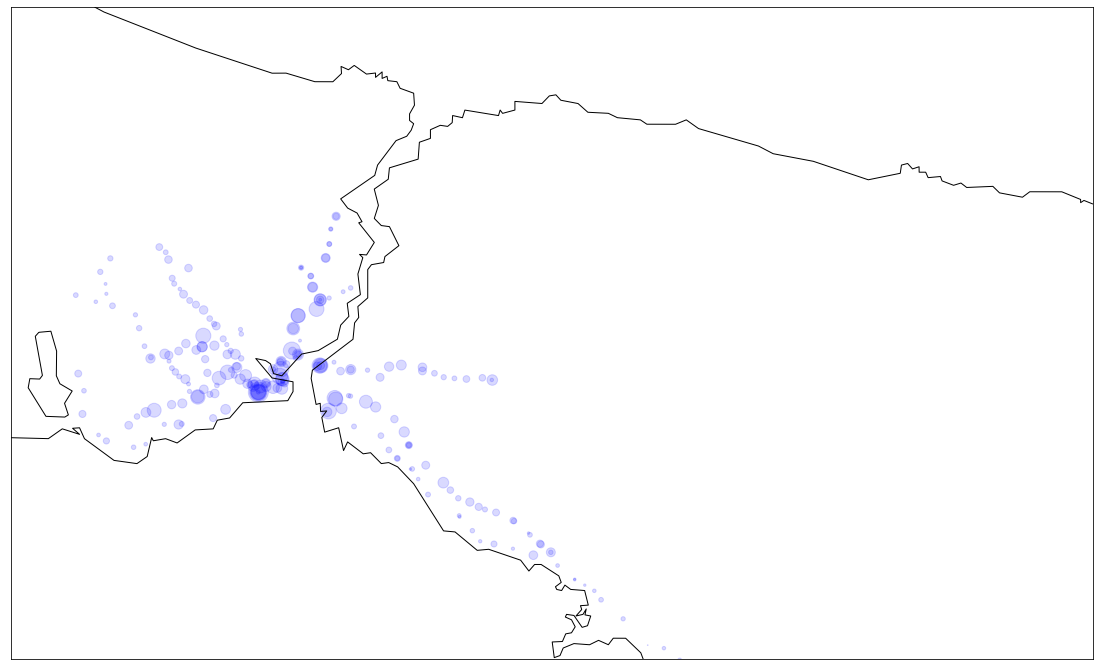

In [215]:
fig = plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat = 40.8,
           urcrnrlat = 41.3,
           llcrnrlon = 28.7,
           urcrnrlon = 29.8,
           resolution='h')

m.drawcoastlines()

xs,ys = m(rail['longitude'], rail['latitude'])
sizes = rail['size']
m.scatter(xs, ys, s=sizes/20, c='blue', alpha=0.15)

xs,ys = m(sea['longitude'], sea['latitude'])
sizes = sea['size']
m.scatter(xs, ys, s=sizes, c='red', alpha=0.5)


plt.show()

In [181]:
rawSea

,Yil,Ay,Otorite Adi,Istasyon Adi,Yolcu Sayisi
0,2021,3,Beyden Deniz Ulaşım Hizmetleri Turizm ve Tic. ...,BEYKOZ,5076
1,2021,3,Beyden Deniz Ulaşım Hizmetleri Turizm ve Tic. ...,YENIKOY,5347
2,2021,3,DENTUR - AVRASYA DENİZ TAŞ.TUR.HİZ.İNŞ.SAN.TİC...,BESIKTAS,106334
3,2021,3,DENTUR - AVRASYA DENİZ TAŞ.TUR.HİZ.İNŞ.SAN.TİC...,KABATAS,24
4,2021,3,DENTUR - AVRASYA DENİZ TAŞ.TUR.HİZ.İNŞ.SAN.TİC...,USKUDAR,94200
...,...,...,...,...,...
656,2021,11,TURYOL - S.S. TURİZM VE YOLCU DENİZ TAŞIYICILA...,Eminönü,55387
657,2021,11,TURYOL - S.S. TURİZM VE YOLCU DENİZ TAŞIYICILA...,Kadıköy Balon,40680
658,2021,11,TURYOL - S.S. TURİZM VE YOLCU DENİZ TAŞIYICILA...,Kadıköy Çayırbaşı,69443
659,2021,11,TURYOL - S.S. TURİZM VE YOLCU DENİZ TAŞIYICILA...,Karaköy,55098


In [196]:
?re.sub


In [206]:

ns

,STATION_NAME
0,MALTEPE
1,AHIRKAPI
2,BEŞİKTAŞ
3,BEŞİKTAŞ
4,BOSTANCI
5,EMİNÖNÜ
6,EMİNÖNÜ
7,EMİNÖNÜ
8,EMİNÖNÜ
9,HAYDARPAŞA


In [200]:
res

[{'latitude': 40.91681013544846, 'longitude': 29.13060758098593},
 {'latitude': 41.00314456999032, 'longitude': 28.98289668101853},
 {'latitude': 41.04116198628195, 'longitude': 29.00778819900819},
 {'latitude': 41.04065414312002, 'longitude': 29.0055048939288},
 {'latitude': 40.95173395654253, 'longitude': 29.09425745312653},
 {'latitude': 41.01495987953694, 'longitude': 28.97621869809887},
 {'latitude': 41.01495987953694, 'longitude': 28.97621869809887},
 {'latitude': 41.01488637107048, 'longitude': 28.97495985342729},
 {'latitude': 41.01488637107048, 'longitude': 28.97495985342729},
 {'latitude': 40.99577360085738, 'longitude': 29.01810215560077},
 {'latitude': 41.03138737936629, 'longitude': 28.99325211289065},
 {'latitude': 40.99098891945888, 'longitude': 29.02211572735011},
 {'latitude': 40.99126123485841, 'longitude': 29.02378422054707},
 {'latitude': 41.02205353005713, 'longitude': 28.97590906576235},
 {'latitude': 41.02151363263756, 'longitude': 28.97517820592657},
 {'latitude